# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [1]:
import sklearn.datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [5]:
#!pip install -U jupyter

In [4]:
# CODE HERE 
# IF you got stuck use GOOGLE 

from sklearn.datasets import fetch_openml

digits = fetch_openml('mnist_784', as_frame=False)

D:\Anaconda2\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### exploring and preparing the dataset

#### print your dataset to get insight

In [5]:
digits

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [ ]:
# CODE HERE


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

#### Split you data into data and labels (target)

In [6]:
# CODE HERE
data=digits.data
lbl=digits.target

#### find the data shape using .shape function

In [7]:
data.shape

(70000, 784)

In [ ]:
# CODE HERE


(70000, 784)

### Peek at one digit from the dataset

In [8]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

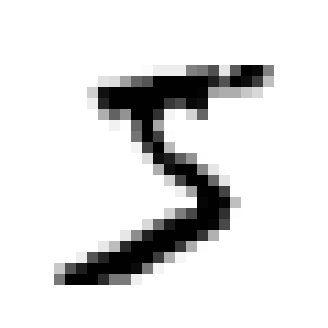

In [9]:
# select the first row
plt.figure(figsize=(4,4))
first=data[0].reshape(28,28)
plt.imshow(first, cmap="binary")
plt.axis("off");

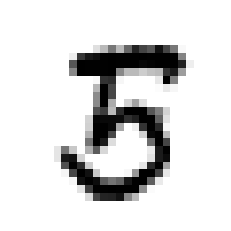

In [ ]:
# CODE HERE 


#### Split the data into train and test set

In [10]:
# CODE HERE 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lbl, test_size=0.3, random_state=42)

### Shuffling the training set

In [30]:
#hint shuffle-vs-permutation-numpy
# CODE HERE

from sklearn.utils import shuffle
X_tr_sh, y_tr_sh = shuffle(X_train,y_train)


#### access the label of the above digit image 

In [13]:
fv_lbl=lbl[0]
fv_lbl

'5'

In [ ]:
# CODE HERE


'5'

### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [42]:
# CODE HERE
# If you got stuck use GOOGLE
y_tr_fv= (y_tr_sh==fv_lbl)
y_test_fv=  (y_test==fv_lbl)

### SGD classifier

#### Create a SGD classifier 

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
sgd=SGDClassifier(random_state=42)

In [ ]:
# CODE HERE


SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [47]:
sgd.fit(X_tr_sh, y_tr_fv)

SGDClassifier(random_state=42)

In [48]:
y_pred=sgd.predict(X_test)

In [ ]:
# CODE HERE


array([ True])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [50]:
from sklearn.model_selection import cross_val_score

In [53]:
cv= cross_val_score(sgd,X_tr_sh, y_tr_fv,cv=3)

In [54]:
cv

array([0.95549161, 0.94391722, 0.97042797])

In [ ]:
# CODE HERE


array([0.9663, 0.9452, 0.9532])

#### Try a dumb classifier

In [55]:
# CODE HERE
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_tr_sh, y_tr_fv)

DummyClassifier()

#### find cross_val_score for the dumb classifier

In [56]:
dcv=cross_val_score(dummy_clf,X_tr_sh, y_tr_fv,cv=3)
dcv

array([0.91024856, 0.91024307, 0.91024307])

In [ ]:
#CODE HERE


array([0.9112 , 0.9098 , 0.90795])

## Confusion matrix

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [61]:
cm=confusion_matrix(y_test_fv ,y_pred)
cm

array([[18985,   100],
       [  839,  1076]], dtype=int64)

In [ ]:
# CODE HERE


array([[52786,  1793],
       [  913,  4508]], dtype=int64)

####  try perfect classifier which will have only true positives and true negative


In [70]:
cm2=confusion_matrix(y_tr_fv, y_tr_fv)
cm2

array([[44602,     0],
       [    0,  4398]], dtype=int64)

In [ ]:
# CODE HERE


array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [72]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [74]:
prc=precision_score(y_test_fv ,y_pred)
prc

0.9149659863945578

In [ ]:
# CODE HERE


0.7154419933343914

#### find recall score

In [ ]:
# CODE HERE


0.831580889134846

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [75]:
f1=f1_score(y_test_fv ,y_pred)
f1

0.6962148172112586

In [ ]:
# CODE HERE


0.7691520218392766

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [76]:
df=sgd.decision_function(X_tr_sh)
df

array([-18958.70747124, -22123.3630468 , -27396.38806172, ...,
          733.52028758, -11783.55486349, -26531.23641483])

In [ ]:
# CODE HERE


array([4914.69426452])

#### Set the threshold to zero

In [85]:
threshold = 0
y_some_digit_pred = (df > threshold)
y_some_digit_pred

array([False, False, False, ...,  True, False, False])

In [ ]:
# CODE HERE


array([ True])

#### Set the threshold to 200000

In [86]:
threshold = 200000
y_some_digit_pred = (df > threshold)
y_some_digit_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# CODE HERE


array([False])

#### To decide which threshold you want to use find decision scores for all instances

In [87]:
y_scores = cross_val_predict(sgd, X_tr_sh, y_tr_fv, cv=3,
                             method="decision_function")
y_scores

array([-10169.03734816, -12149.74389241, -19032.73934123, ...,
         6102.13922256, -11027.48599172, -25669.70478914])

In [ ]:
# CODE HERE


array([-12194.76411527, -22007.4062434 ,  -6016.53379274, ...,
       -21527.81640879, -11638.19845222,  -3883.00357483])

#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [89]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_tr_fv, y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

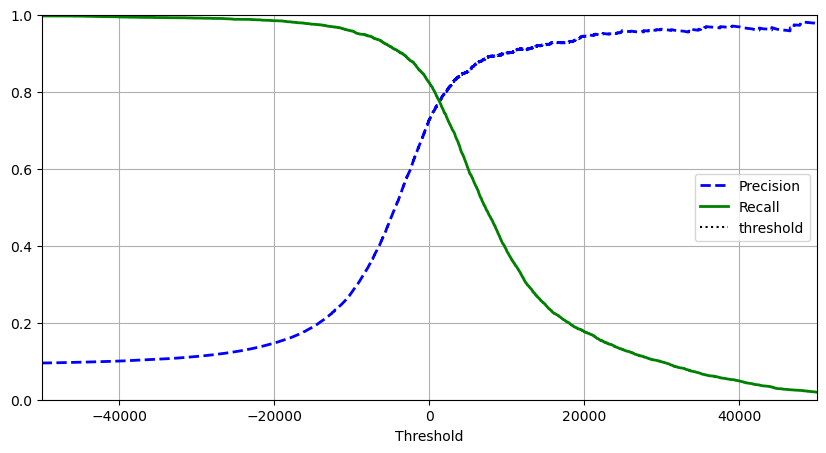

In [93]:
# CODE HERE
plt.figure(figsize=(10,5)) 
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right");

#### lets aim for 90%recall 
#### try different threshold and see what will happen

#### precision score

In [102]:
idx_for_30_precision = (precisions >= 0.3).argmax()
threshold_for_30_precision = thresholds[idx_for_30_precision]
threshold_for_30_precision

-9258.688404224644

In [103]:
y_train_pred_30 = (y_scores >= threshold_for_30_precision)

In [104]:
precision_score(y_tr_fv, y_train_pred_30)

0.30001434102968594

In [ ]:
# CODE HERE


0.32735085945399395

#### recall score

In [115]:
(recalls >= 0.8)

array([ True,  True,  True, ..., False, False, False])

In [135]:
idx_for_90_recall = (recalls >= 0.9).argmin()
threshold_for_90_recall = thresholds[idx_for_90_recall]
threshold_for_90_recall

-3515.5794371595684

In [136]:
y_train_recall_90 = (y_scores >= threshold_for_90_recall)

In [137]:
recall_score(y_tr_fv, y_train_recall_90)

0.8999545247839927

In [ ]:
#CODE HERE


0.955543257701531

# The ROC Curve

In [182]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_tr_fv, y_scores)

#### plot the FPR against the TPR using Matplotlib

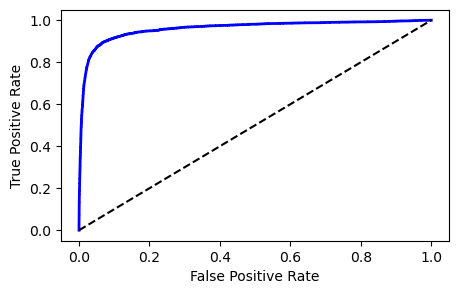

In [183]:
plt.figure(figsize=(5,3))  # extra code – not needed, just formatting

plt.plot(fpr, tpr, "b-", linewidth=2)
plt.plot([0, 1], [0, 1],'--',c='black');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate");

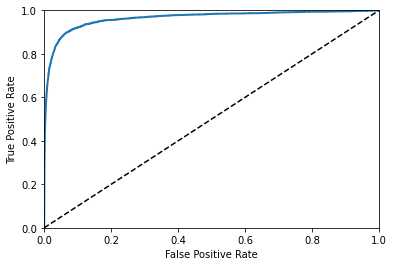

In [ ]:
# CODE HERE


#### computing the ROC AUC score

In [159]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_tr_fv, y_scores)

0.9603335745043031

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9642300087518364

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf=RandomForestClassifier(random_state=42)

In [162]:
rf.fit(X_tr_sh, y_tr_fv)

RandomForestClassifier(random_state=42)

In [184]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([False, False, False, ..., False, False,  True])

#### try to plot ROC 
***Notice that you will need scores not probabilities***

In [190]:
y_proba=cross_val_predict(rf, X_tr_sh, y_tr_fv, cv=3, method="predict_proba")
y_scores_forest = y_proba[:, 1] 
y_train_pred_forest = y_proba[:, 1] >= 0.5

In [192]:
fpr2, tpr2, thresholds2 = roc_curve(y_tr_fv, y_scores_forest)

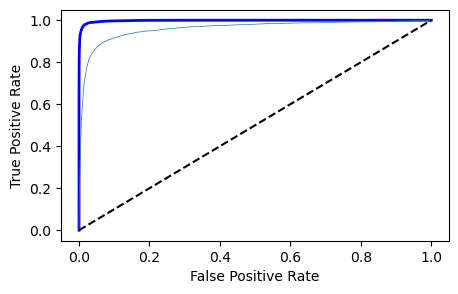

In [205]:
plt.figure(figsize=(5,3))  # extra code – not needed, just formatting

plt.plot(fpr2, tpr2, "b-", linewidth=2)
plt.plot(fpr, tpr, linewidth=0.5)
plt.plot([0, 1], [0, 1],'--',c='black');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate");

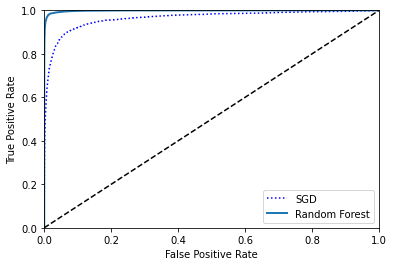

In [ ]:
# CODE HERE
# if you got suck use GOOGLE


#### find ROC AUC score for randomforestclassifier

In [194]:
roc_auc_score(y_tr_fv, y_scores_forest)

0.998217441271647

In [ ]:
# CODE HERE 


0.9984712735923079


# Congrats you did it 🥳 !
# #shAI_Club